In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
df = pd.read_csv('/Users/a123/Desktop/DATA1030/Twitter Stock Market Dataset.csv')
# df = df.dropna()
print(df.dtypes) 
df.shape

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


(2259, 7)

In [2]:
print(df['Open'].describe())
print(df['High'].describe())
print(df['Low'].describe())
print(df['Close'].describe())
print(df['Adj Close'].describe())
print(df['Volume'].describe())

count    2259.000000
mean       36.020286
std        14.118463
min        13.950000
25%        25.550000
50%        35.419998
75%        44.205000
max        78.360001
Name: Open, dtype: float64
count    2259.000000
mean       36.699881
std        14.372057
min        14.220000
25%        26.215001
50%        36.099998
75%        45.015000
max        80.750000
Name: High, dtype: float64
count    2259.000000
mean       35.339465
std        13.828724
min        13.725000
25%        24.912501
50%        34.820000
75%        43.327501
max        76.050003
Name: Low, dtype: float64
count    2259.000000
mean       36.003625
std        14.089989
min        14.010000
25%        25.410000
50%        35.490002
75%        44.135000
max        77.629997
Name: Close, dtype: float64
count    2259.000000
mean       36.003625
std        14.089989
min        14.010000
25%        25.410000
50%        35.490002
75%        44.135000
max        77.629997
Name: Adj Close, dtype: float64
count    2.259000e+0

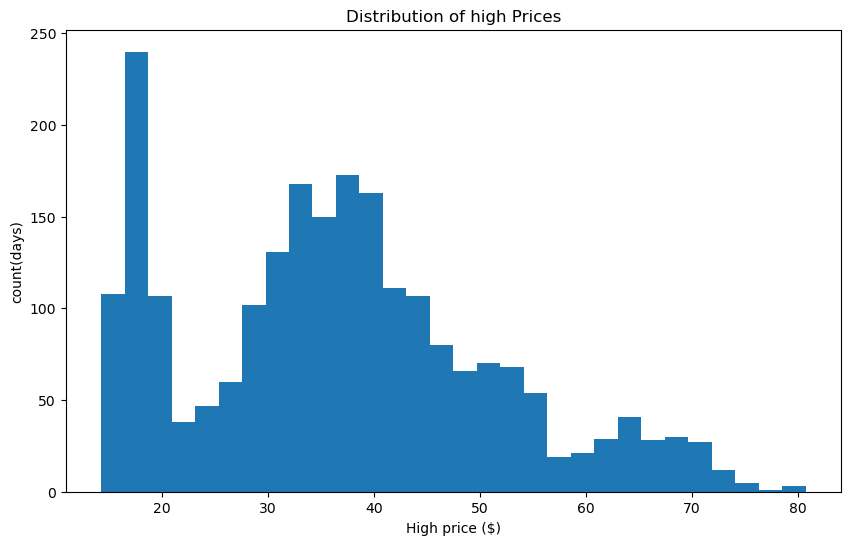

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10,6))
df['High'].plot.hist(bins=30)  
plt.xlabel('High price ($)')
plt.ylabel('count(days)')
plt.title("Distribution of high Prices")
plt.savefig("/Users/a123/Desktop/datas/High_prices_distribution.png", dpi=300)
plt.show()
plt.close()


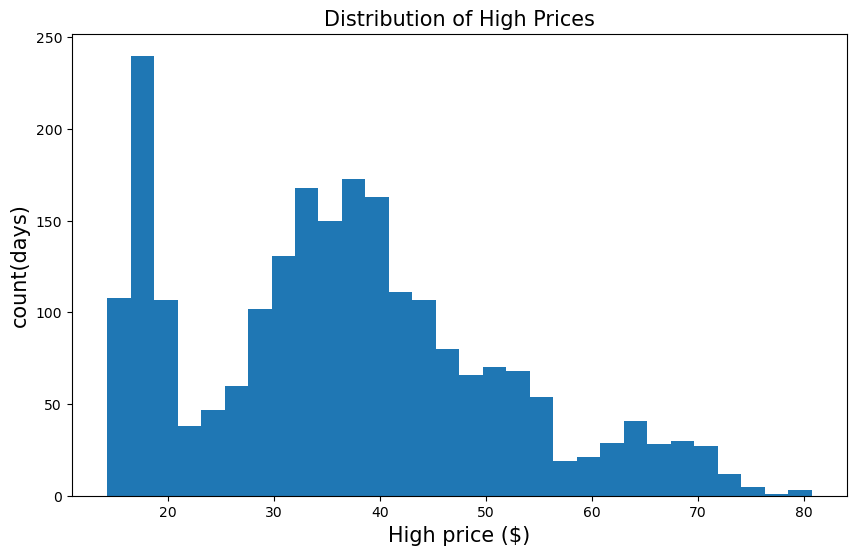

In [4]:
plt.figure(figsize=(10,6))

df['High'].plot.hist(bins = 30)  
plt.xlabel('High price ($)',fontsize = 15)
plt.ylabel('count(days)',fontsize = 15)
plt.title("Distribution of High Prices",fontsize = 15)
plt.show()

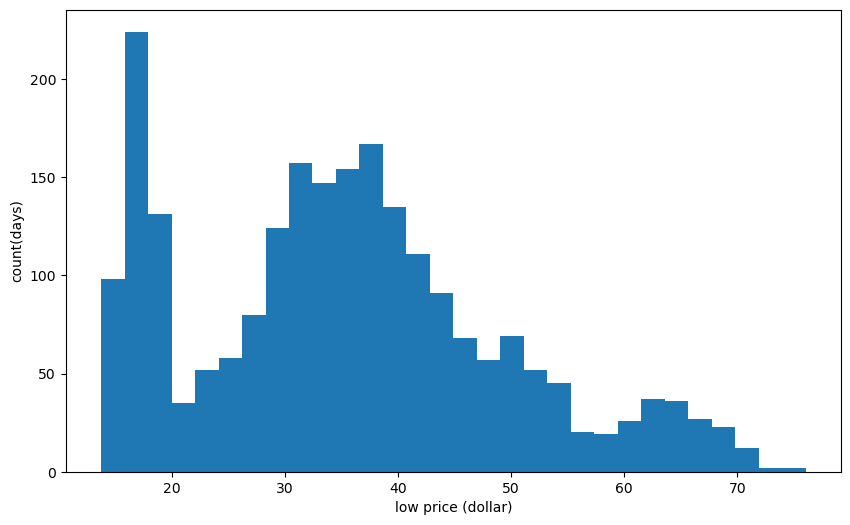

In [5]:
plt.figure(figsize=(10,6))

df['Low'].plot.hist(bins = 30)  
plt.xlabel('low price (dollar)')
plt.ylabel('count(days)')
plt.show()

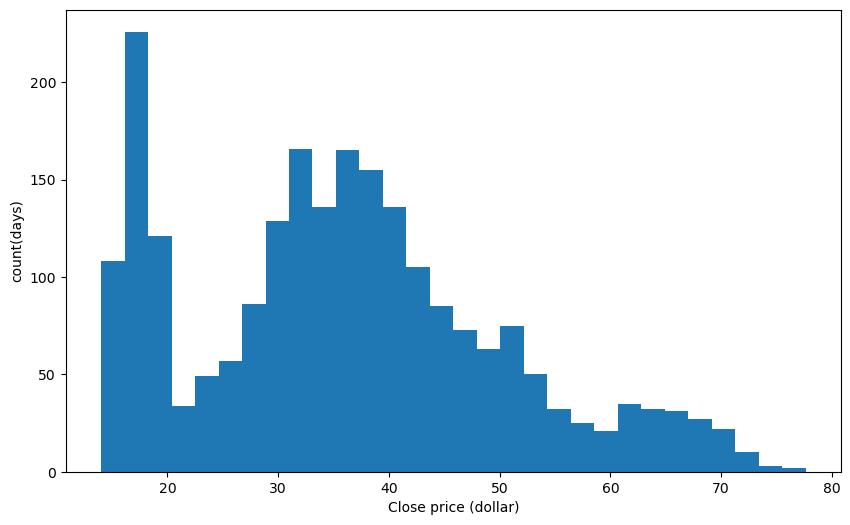

In [6]:
plt.figure(figsize=(10,6))

df['Close'].plot.hist(bins = 30)  
plt.xlabel('Close price (dollar)')
plt.ylabel('count(days)')
plt.show()

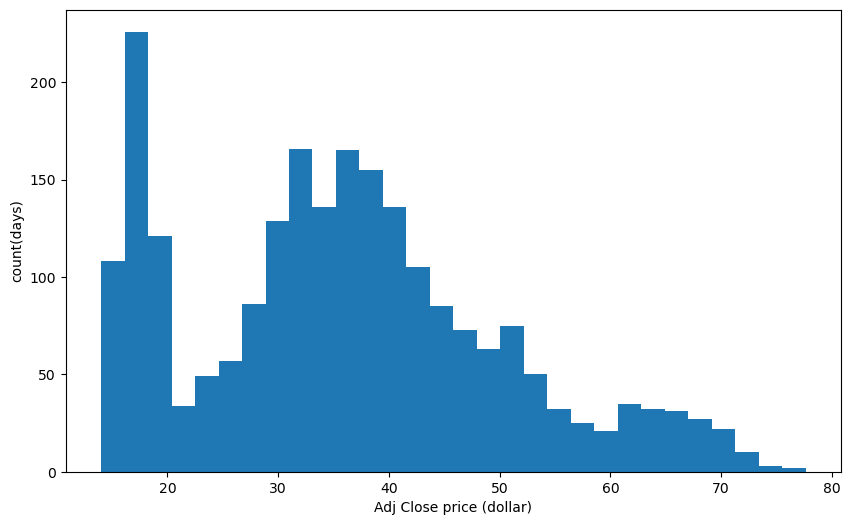

In [7]:
plt.figure(figsize=(10,6))

df['Adj Close'].plot.hist(bins = 30)   
plt.xlabel('Adj Close price (dollar)')
plt.ylabel('count(days)')
plt.show()

[0.99955733 0.99446343 0.98962648 0.98457377 0.97986612 0.97494359
 0.97054339 0.96577852 0.96082164 0.95566665]


/Users/a123/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/a123/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


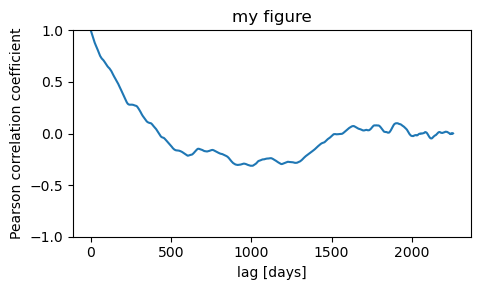

In [8]:
# let's create an autocorrelation plot

lags = np.arange(3650)
corr_coefs = np.zeros(3650)

for i in np.arange(len(lags)):
    x = df['Open'].iloc[i:-1].reset_index(drop=True) # recent observations
    y = df['Open'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs[i] = x.corr(y,method='pearson')*x.shape[0]/df['Open'].shape[0]
print(corr_coefs[:10])

plt.figure(figsize=(5,3))
plt.plot(lags[2:],corr_coefs[2:])
plt.ylim([-1,1])
plt.xlabel('lag [days]')
plt.ylabel('Pearson correlation coefficient')
plt.title('my figure')
plt.tight_layout()
plt.show()

# # a one-liner
# plt.figure(figsize=(5,3))

# pd.plotting.autocorrelation_plot(df['Close'])
# plt.title("pandas's autocorrelation plot")
# plt.tight_layout()
# plt.show()

[0.99955733 0.99462991 0.98975446 0.98457664 0.97976004 0.97491039
 0.97030246 0.96547423 0.96084149 0.95561692]


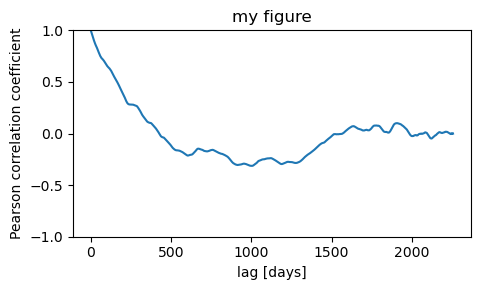

In [9]:
lags = np.arange(3650)
corr_coefs = np.zeros(3650)

for i in np.arange(len(lags)):
    x = df['Close'].iloc[i:-1].reset_index(drop=True) # recent observations
    y = df['Close'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs[i] = x.corr(y,method='pearson')*x.shape[0]/df['Close'].shape[0]
print(corr_coefs[:10])

plt.figure(figsize=(5,3))
plt.plot(lags[2:],corr_coefs[2:])
plt.ylim([-1,1])
plt.xlabel('lag [days]')
plt.ylabel('Pearson correlation coefficient')
plt.title('my figure')
plt.tight_layout()
plt.show()


Degrees of freedom <= 0 for slice
divide by zero encountered in divide


[0.99955733 0.99528664 0.99046513 0.98537478 0.98057389 0.97575498
 0.97116889 0.96635519 0.96146577 0.95630124]


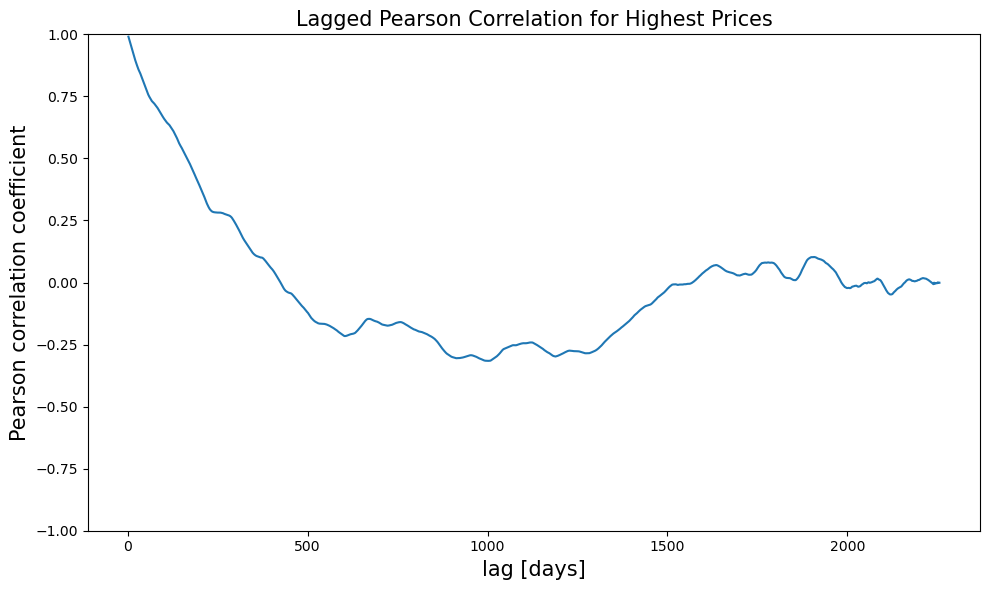

In [35]:
lags = np.arange(3650)
corr_coefs = np.zeros(3650)

for i in np.arange(len(lags)):
    x = df['High'].iloc[i:-1].reset_index(drop=True) # recent observations
    y = df['High'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs[i] = x.corr(y,method='pearson')*x.shape[0]/df['High'].shape[0]
print(corr_coefs[:10])

plt.figure(figsize=(10,6))
plt.plot(lags[2:],corr_coefs[2:])
plt.ylim([-1,1])
plt.xlabel('lag [days]',fontsize=15)
plt.ylabel('Pearson correlation coefficient',fontsize=15)
plt.title("Lagged Pearson Correlation for Highest Prices",fontsize=15)
plt.savefig("/Users/a123/Desktop/datas/Lagged_Pearson_Correlation_for_Highest_Prices.png", dpi=300)
plt.tight_layout()
plt.show()


[0.99955733 0.99519892 0.98997126 0.98474211 0.97976046 0.97482727
 0.97020103 0.96555508 0.96084167 0.95564007]


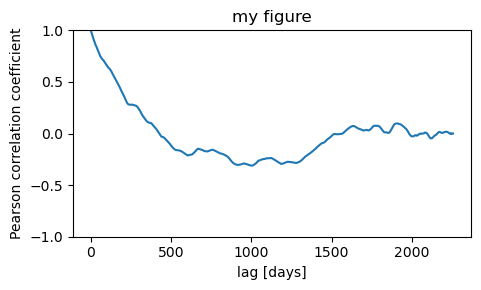

In [11]:
lags = np.arange(3650)
corr_coefs = np.zeros(3650)

for i in np.arange(len(lags)):
    x = df['Low'].iloc[i:-1].reset_index(drop=True) # recent observations
    y = df['Low'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs[i] = x.corr(y,method='pearson')*x.shape[0]/df['Low'].shape[0]
print(corr_coefs[:10])

plt.figure(figsize=(5,3))
plt.plot(lags[2:],corr_coefs[2:])
plt.ylim([-1,1])
plt.xlabel('lag [days]')
plt.ylabel('Pearson correlation coefficient')
plt.title('my figure')
plt.tight_layout()
plt.show()


[0.99955733 0.99462991 0.98975446 0.98457664 0.97976004 0.97491039
 0.97030246 0.96547423 0.96084149 0.95561692]


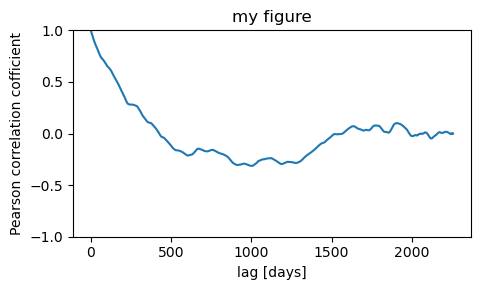

In [12]:
lags = np.arange(3650)
corr_coefs = np.zeros(3650)

for i in np.arange(len(lags)):
    x = df['Adj Close'].iloc[i:-1].reset_index(drop=True) # recent observations
    y = df['Adj Close'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs[i] = x.corr(y,method='pearson')*x.shape[0]/df['Adj Close'].shape[0]
print(corr_coefs[:10])

plt.figure(figsize=(5,3))
plt.plot(lags[2:],corr_coefs[2:])
plt.ylim([-1,1])
plt.xlabel('lag [days]')
plt.ylabel('Pearson correlation cofficient')
plt.title('my figure')
plt.tight_layout()
plt.show()

[0.99955733 0.57621784 0.37718927 0.29677085 0.25755675 0.25723414
 0.24815366 0.22689127 0.24202975 0.19136387]


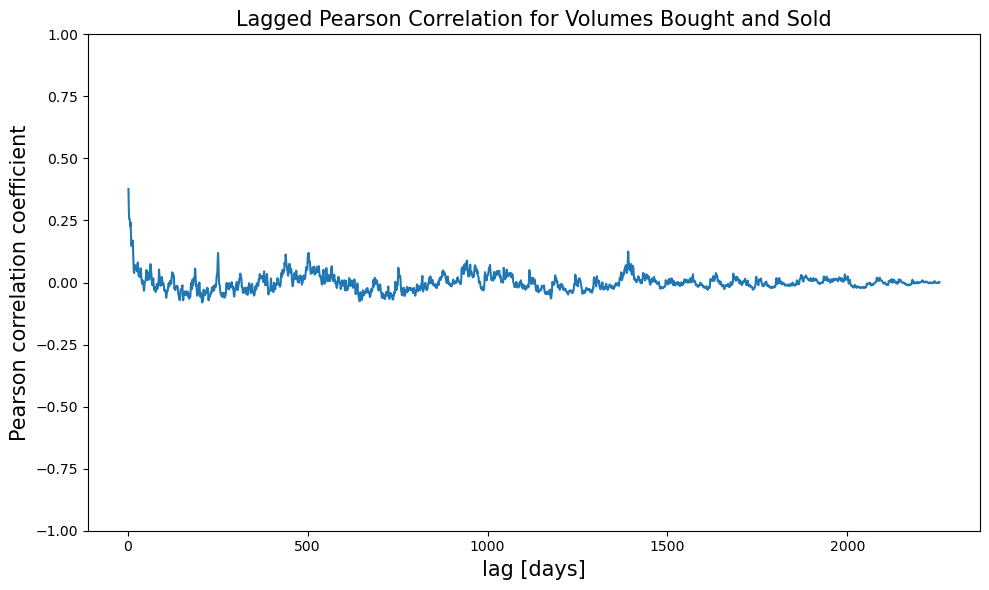

In [13]:
lags = np.arange(3650)
corr_coefs = np.zeros(3650)

for i in np.arange(len(lags)):
    x = df['Volume'].iloc[i:-1].reset_index(drop=True) # recent observations
    y = df['Volume'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs[i] = x.corr(y,method='pearson')*x.shape[0]/df['Volume'].shape[0]
print(corr_coefs[:10])

plt.figure(figsize=(10,6))
plt.plot(lags[2:],corr_coefs[2:])
plt.ylim([-1,1])
plt.xlabel('lag [days]',fontsize=15)
plt.ylabel('Pearson correlation coefficient',fontsize=15)
plt.title("Lagged Pearson Correlation for Volumes Bought and Sold",fontsize=15)
plt.tight_layout()
plt.show()

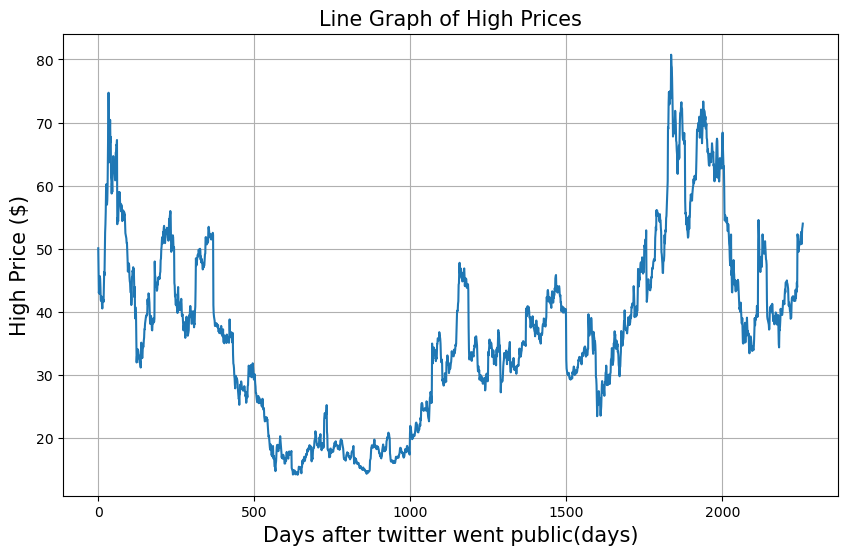

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


plt.plot(df['High'])

plt.xlabel('Days after twitter went public(days)',fontsize=15)
plt.ylabel('High Price ($)',fontsize=15)
plt.title("Line Graph of High Prices",fontsize=15)
plt.savefig("/Users/a123/Desktop/datas/Line_graph_of_high_prices.png", dpi=300)
plt.grid(True) 
plt.show()

In [15]:
df['Date'] = pd.to_datetime(df.Date)

# Extract day, month, and year into separate columns
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['DayOfWeek'] = df['Date'].dt.strftime('%A')

df = df.drop(columns=['Date'])

In [16]:
# help(pd.concat)
y = df['High']
variable_list = []
name_list = []
for i in {'Open','High','Low','Close','Adj Close','Volume','Day','Month','Year','DayOfWeek'} :
    for j in {1,3,7,14,30,90,180,360}:
        variable_list.append(df[i].shift(j))
        name_string= i + " lag " + str(j) + " days"
        name_list.append(name_string)
X = pd.concat(variable_list,axis=1)
X.columns = name_list

print(X.columns)

print(X.shape)

Index(['Low lag 1 days', 'Low lag 3 days', 'Low lag 7 days',
       'Low lag 360 days', 'Low lag 14 days', 'Low lag 180 days',
       'Low lag 90 days', 'Low lag 30 days', 'Day lag 1 days',
       'Day lag 3 days', 'Day lag 7 days', 'Day lag 360 days',
       'Day lag 14 days', 'Day lag 180 days', 'Day lag 90 days',
       'Day lag 30 days', 'Open lag 1 days', 'Open lag 3 days',
       'Open lag 7 days', 'Open lag 360 days', 'Open lag 14 days',
       'Open lag 180 days', 'Open lag 90 days', 'Open lag 30 days',
       'Volume lag 1 days', 'Volume lag 3 days', 'Volume lag 7 days',
       'Volume lag 360 days', 'Volume lag 14 days', 'Volume lag 180 days',
       'Volume lag 90 days', 'Volume lag 30 days', 'Year lag 1 days',
       'Year lag 3 days', 'Year lag 7 days', 'Year lag 360 days',
       'Year lag 14 days', 'Year lag 180 days', 'Year lag 90 days',
       'Year lag 30 days', 'Month lag 1 days', 'Month lag 3 days',
       'Month lag 7 days', 'Month lag 360 days', 'Month lag 14 days

In [17]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, shuffle=False,random_state=42)

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

cat_ftrs = ['DayOfWeek lag 1 days', 'DayOfWeek lag 3 days', 'DayOfWeek lag 7 days',
       'DayOfWeek lag 360 days', 'DayOfWeek lag 14 days',
       'DayOfWeek lag 180 days', 'DayOfWeek lag 90 days',
       'DayOfWeek lag 30 days']
num_ftrs = ['Month lag 1 days', 'Month lag 3 days', 'Month lag 7 days',
       'Month lag 360 days', 'Month lag 14 days', 'Month lag 180 days',
       'Month lag 90 days', 'Month lag 30 days', 'High lag 1 days',
       'High lag 3 days', 'High lag 7 days', 'High lag 360 days',
       'High lag 14 days', 'High lag 180 days', 'High lag 90 days',
       'High lag 30 days', 'Close lag 1 days', 'Close lag 3 days',
       'Close lag 7 days', 'Close lag 360 days', 'Close lag 14 days',
       'Close lag 180 days', 'Close lag 90 days', 'Close lag 30 days',
       'Low lag 1 days', 'Low lag 3 days', 'Low lag 7 days',
       'Low lag 360 days', 'Low lag 14 days', 'Low lag 180 days',
       'Low lag 90 days', 'Low lag 30 days', 'Day lag 1 days',
       'Day lag 3 days', 'Day lag 7 days', 'Day lag 360 days',
       'Day lag 14 days', 'Day lag 180 days', 'Day lag 90 days',
       'Day lag 30 days', 'Open lag 1 days', 'Open lag 3 days',
       'Open lag 7 days', 'Open lag 360 days', 'Open lag 14 days',
       'Open lag 180 days', 'Open lag 90 days', 'Open lag 30 days',
       'Year lag 1 days', 'Year lag 3 days', 'Year lag 7 days',
       'Year lag 360 days', 'Year lag 14 days', 'Year lag 180 days',
       'Year lag 90 days', 'Year lag 30 days', 'Adj Close lag 1 days',
       'Adj Close lag 3 days', 'Adj Close lag 7 days',
       'Adj Close lag 360 days', 'Adj Close lag 14 days',
       'Adj Close lag 180 days', 'Adj Close lag 90 days',
       'Adj Close lag 30 days', 'Volume lag 1 days', 'Volume lag 3 days',
       'Volume lag 7 days', 'Volume lag 360 days', 'Volume lag 14 days',
       'Volume lag 180 days', 'Volume lag 90 days', 'Volume lag 30 days']

# one-hot encoder
# We need to replace the NaN with a string first!
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=0)),
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore')),
    ('scaler', StandardScaler())])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs)])


# fit_transform the train and validation set
X_prep = preprocessor.fit_transform(X_train)
# the feature names after fit
feature_names = preprocessor.get_feature_names_out()

# you can convert the numpy array back to a data frame with the feature names if you want
df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(df_train.shape)


# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)
print(feature_names)

(1807, 120)
(452, 120)
['num__Month lag 1 days' 'num__Month lag 3 days' 'num__Month lag 7 days'
 'num__Month lag 360 days' 'num__Month lag 14 days'
 'num__Month lag 180 days' 'num__Month lag 90 days'
 'num__Month lag 30 days' 'num__High lag 1 days' 'num__High lag 3 days'
 'num__High lag 7 days' 'num__High lag 360 days' 'num__High lag 14 days'
 'num__High lag 180 days' 'num__High lag 90 days' 'num__High lag 30 days'
 'num__Close lag 1 days' 'num__Close lag 3 days' 'num__Close lag 7 days'
 'num__Close lag 360 days' 'num__Close lag 14 days'
 'num__Close lag 180 days' 'num__Close lag 90 days'
 'num__Close lag 30 days' 'num__Low lag 1 days' 'num__Low lag 3 days'
 'num__Low lag 7 days' 'num__Low lag 360 days' 'num__Low lag 14 days'
 'num__Low lag 180 days' 'num__Low lag 90 days' 'num__Low lag 30 days'
 'num__Day lag 1 days' 'num__Day lag 3 days' 'num__Day lag 7 days'
 'num__Day lag 360 days' 'num__Day lag 14 days' 'num__Day lag 180 days'
 'num__Day lag 90 days' 'num__Day lag 30 days' 'num__O

/Users/a123/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
perc_missing_per_ftr = df_train.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:' )
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
import shap

fraction of missing values in features:
num__Month lag 1 days       0.000443
num__Month lag 3 days       0.001328
num__Month lag 7 days       0.003099
num__Month lag 360 days     0.159363
num__Month lag 14 days      0.006197
                              ...   
num__Volume lag 360 days    0.159363
num__Volume lag 14 days     0.006197
num__Volume lag 180 days    0.079681
num__Volume lag 90 days     0.039841
num__Volume lag 30 days     0.013280
Length: 72, dtype: float64


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [20]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

xgb = XGBRegressor()
param_grid = {"learning_rate": [0.03],
              "n_estimators": [10000],
              "seed": [0],
              "reg_alpha": [1e-1, 1e0, 1e1],
              "reg_lambda": [1e-1, 1e0, 1e1],
              "missing": [np.nan], 
              "max_depth": [1,3,10],
              "colsample_bytree": [0.9],              
              "subsample": [0.66]}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=TimeSeriesSplit(n_splits=5), verbose=1, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(df_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(df_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  
plt.show()


Fitting 5 folds for each of 27 candidates, totalling 135 fits


KeyboardInterrupt: 

In [43]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

xgb = XGBRegressor()
param_grid = {
    "learning_rate": [0.03],
    "n_estimators": [1000],
    "reg_alpha": [1e-2,1e-1, 1e0, 1e1,1e2],
    "reg_lambda": [1e-2,1e-1, 1e0, 1e1,1e2],
    "missing": [np.nan],
    "max_depth": [1, 3, 10, 30, 50],
    "colsample_bytree": [0.9],
    "subsample": [0.66],
}

mean_scores = []
std_scores = []

for i in range(5):
    xgb = XGBRegressor(seed=i)
    random_search = RandomizedSearchCV(
        estimator=xgb,
        param_distributions=param_grid,
        cv=TimeSeriesSplit(n_splits=3),
        verbose=1,
        n_jobs=-1,
        scoring="neg_mean_squared_error",
        random_state=i,
    )
    random_search.fit(df_train, y_train)    
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(df_test)
    mse = mean_squared_error(y_test, y_pred)
    mean_scores.append(mse)
    print("Random state =", i)
    print("Mean test score:", random_search.best_score_)
    print("Best parameters:", random_search.best_params_)
print("---")
print("Mean of mean scores:", np.mean(mean_scores))
print("Standard deviation of mean scores:", np.std(mean_scores))

best_model = random_search.best_estimator_
y_pred = best_model.predict(df_test)
mse = mean_squared_error(y_test, y_pred)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
Random state = 0
Mean test score: -17.33380086917134
Best parameters: {'subsample': 0.66, 'reg_lambda': 10.0, 'reg_alpha': 1.0, 'n_estimators': 1000, 'missing': nan, 'max_depth': 10, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Random state = 1
Mean test score: -16.896118480683665
Best parameters: {'subsample': 0.66, 'reg_lambda': 10.0, 'reg_alpha': 0.1, 'n_estimators': 1000, 'missing': nan, 'max_depth': 10, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Random state = 2
Mean test score: -17.23875732352857
Best parameters: {'subsample': 0.66, 'reg_lambda': 10.0, 'reg_alpha': 10.0, 'n_estimators': 1000, 'missing': nan, 'max_depth': 3, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Random state = 3
Mean test score: -16.527834997263028
Best par

In [ ]:
best_index = grid_search.best_index_
std_dev_test_scores = grid_search.cv_results_['std_test_score'][best_index]
print("Standard Deviation of Test Scores for Best Parameters: ", std_dev_test_scores)

In [21]:
mask = df_test.isnull()
unique_rows, counts = np.unique(mask, axis=0,return_counts=True)
print(unique_rows.shape) 
for i in range(len(counts)):
    print(unique_rows[i],counts[i])

(1, 120)
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False] 452


In [22]:
missing_train_idx = df_train.index[df_train.isnull().any(axis=1)]
df_train_cleaned = df_train.dropna()
print(df_train_cleaned.shape)
y_train_cleaned = y_train.drop(index=missing_train_idx)
print(y_train_cleaned.shape)

(1447, 120)
(1447,)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:  {'max_depth': 20, 'n_estimators': 100}
Test MSE:  72.18353477949083


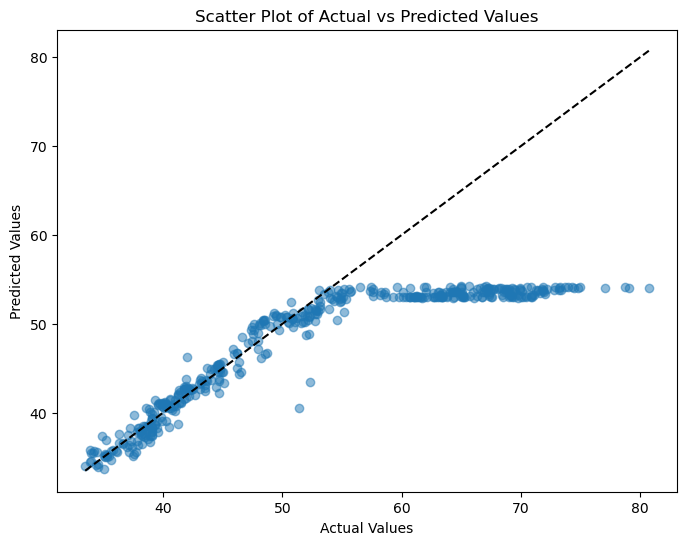

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300,400,1000],  
    'max_depth': [None, 10, 20, 30,50,100] 
}


grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=TimeSeriesSplit(n_splits=5),  
    scoring='neg_mean_squared_error', 
    verbose=1,
    n_jobs=-1  
)

grid_search.fit(df_train_cleaned, y_train_cleaned)
print("Best parameters found: ", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
y_test_pred = best_rf_model.predict(df_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: ", test_mse)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Diagonal line
plt.show()


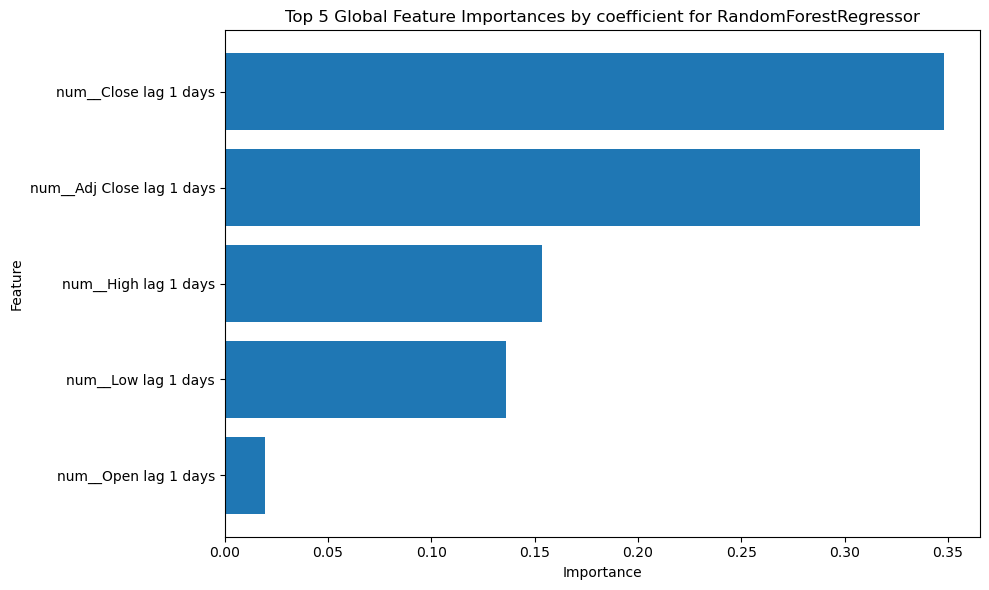

In [68]:
feature_importances = best_rf_model.feature_importances_
features_df = pd.DataFrame({
    'Feature': df_train_cleaned.columns,
    'Importance': feature_importances
})
features_df = features_df.sort_values(by='Importance', ascending=False)
top_features_df = features_df.head(5)
plt.figure(figsize=(10, 6))
plt.barh(top_features_df['Feature'], top_features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Global Feature Importances by coefficient for RandomForestRegressor')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.savefig('/Users/a123/Desktop/datas/random forest feature importance.png', dpi=300)
plt.show()

In [48]:
import numpy as np
import matplotlib.pyplot as plt

param_grid = {
    'n_estimators': [100, 200, 300,400,1000],  
    'max_depth': [None, 10, 20, 30,50,100]  
}
test_scores = []
for random_state in range(5):
    rf = RandomForestRegressor(random_state=random_state)
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=TimeSeriesSplit(n_splits=5),
        scoring='neg_mean_squared_error',
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(df_train_cleaned, y_train_cleaned)
    best_rf_model = grid_search.best_estimator_
    y_test_pred = best_rf_model.predict(df_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_scores.append(test_mse)

mean_score = np.mean(test_scores)
std_deviation = np.std(test_scores)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [50]:
print(mean_score)
print(std_deviation)

75.7835994185819
0.7020757747483848


Fitting 5 folds for each of 49 candidates, totalling 245 fits
Best parameters found:  {'C': 10, 'gamma': 0.01}
Test MSE:  258.97367954712695


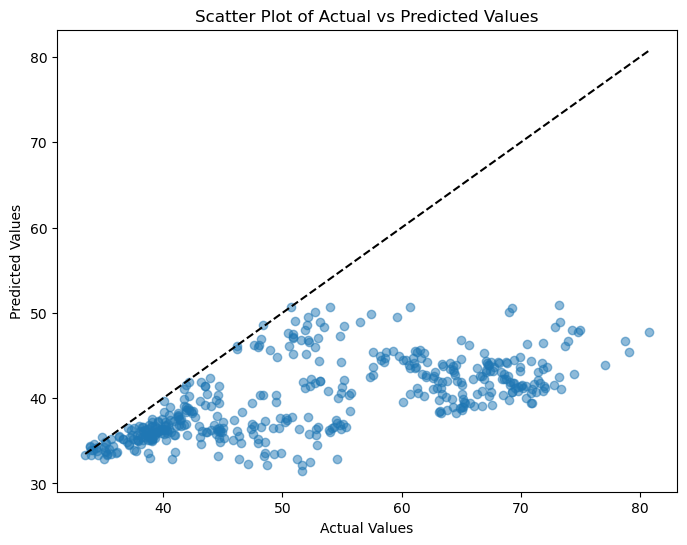

In [26]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

svr_rbf = SVR(kernel='rbf')

param_grid = {
    'C': [0.1, 1, 10, 100,150, 200,500],  
    'gamma': [ 0.0000001, 0.01,0.02 ,0.1, 1, 10, 100]  
}

grid_search = GridSearchCV(
    estimator=svr_rbf, 
    param_grid=param_grid, 
    cv=TimeSeriesSplit(n_splits=5),  
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1 
)

grid_search.fit(df_train_cleaned, y_train_cleaned)
print("Best parameters found: ", grid_search.best_params_)
best_svr_model = grid_search.best_estimator_
y_test_pred = best_svr_model.predict(df_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: ", test_mse)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  
plt.show()


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Users/a123/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/a123/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/a123/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/a123/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/a123/anaconda

/Users/a123/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.291e+02, tolerance: 7.187e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/a123/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.308e+01, tolerance: 1.703e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented 

/Users/a123/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+02, tolerance: 3.225e+00
  model = cd_fast.enet_coordinate_descent(
/Users/a123/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.388e+01, tolerance: 3.225e+00
  model = cd_fast.enet_coordinate_descent(
/Users/a123/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

Best parameters found:  {'alpha': 0.03, 'l1_ratio': 0.9}
Test MSE:  2.14441193598949


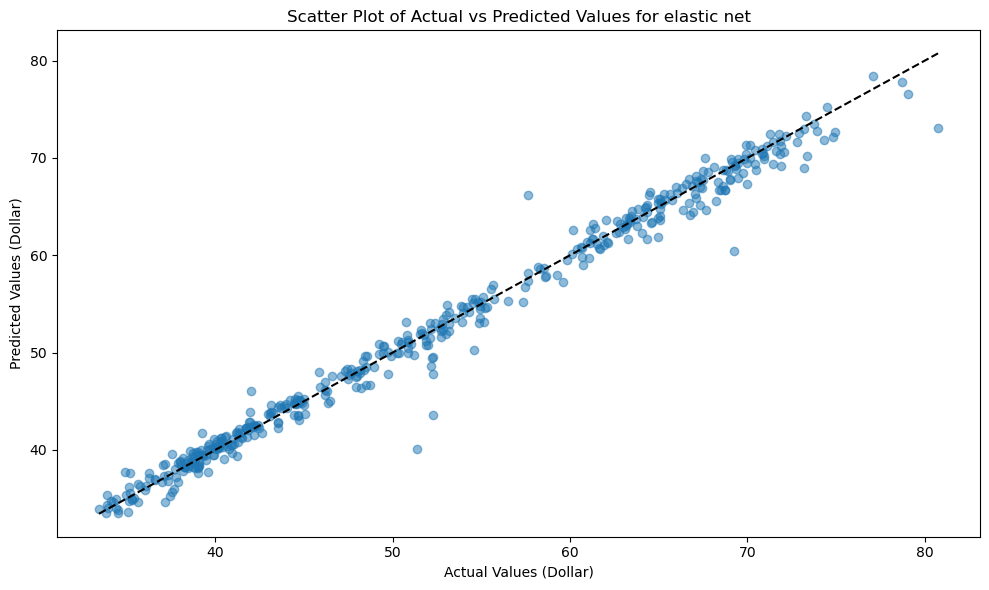

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

elastic_net_reg = ElasticNet()
param_grid = {
    'alpha': [0,0.01,0.03,0.05,0.1,0.5],      
    'l1_ratio': [0.11, 0.25, 0.5, 0.75, 0.9]    
}

grid_search = GridSearchCV(
    estimator=elastic_net_reg, 
    param_grid=param_grid, 
    cv=TimeSeriesSplit(n_splits=5), 
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1 
)
grid_search.fit(df_train_cleaned, y_train_cleaned)
print("Best parameters found: ", grid_search.best_params_)
best_elastic_net_model = grid_search.best_estimator_
y_test_pred = best_elastic_net_model.predict(df_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: ", test_mse)
mean_test_scores = grid_search.cv_results_['mean_test_score']
std_test_scores = grid_search.cv_results_['std_test_score']
mean_test_scores = mean_test_scores.reshape(len(param_grid['alpha']), len(param_grid['l1_ratio']))
std_test_scores = std_test_scores.reshape(len(param_grid['alpha']), len(param_grid['l1_ratio']))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.title('Scatter Plot of Actual vs Predicted Values for elastic net')
plt.xlabel('Actual Values (Dollar)')
plt.ylabel('Predicted Values (Dollar)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Diagonal line
plt.tight_layout()
plt.savefig('Scatter Plot of Actual vs Predicted Values.png', dpi=300)
plt.show()

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np
feature_importances = np.abs(best_elastic_net_model.coef_)
features = df_train_cleaned.columns
sorted_idx = np.argsort(feature_importances)[-5:]  
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]


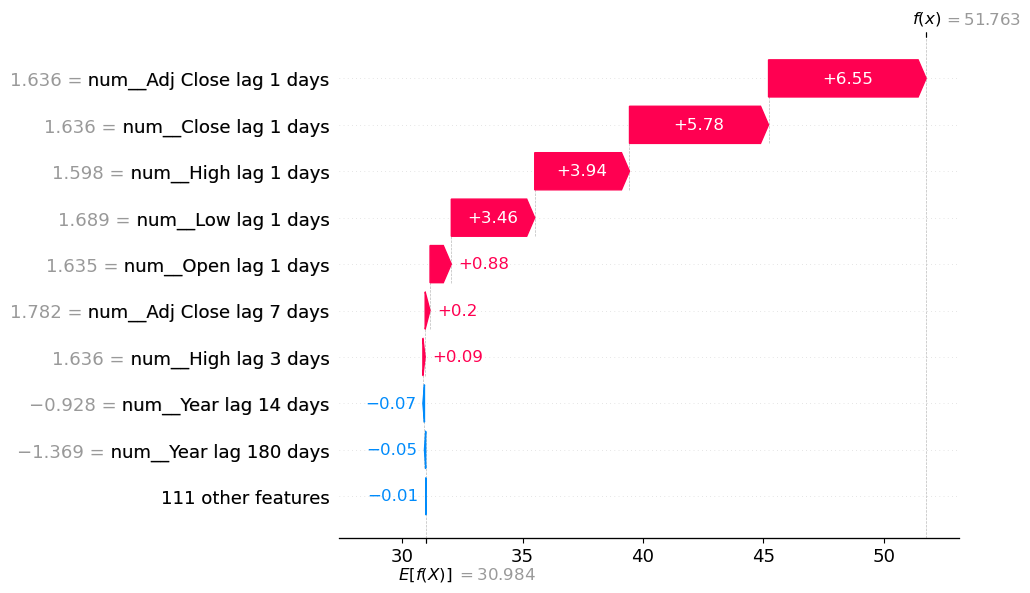

In [49]:
import shap
import matplotlib.pyplot as plt
explainer = shap.Explainer(best_elastic_net_model, df_train_cleaned)
shap_values = explainer(df_train_cleaned)
shap.plots.waterfall(shap_values[0]) 


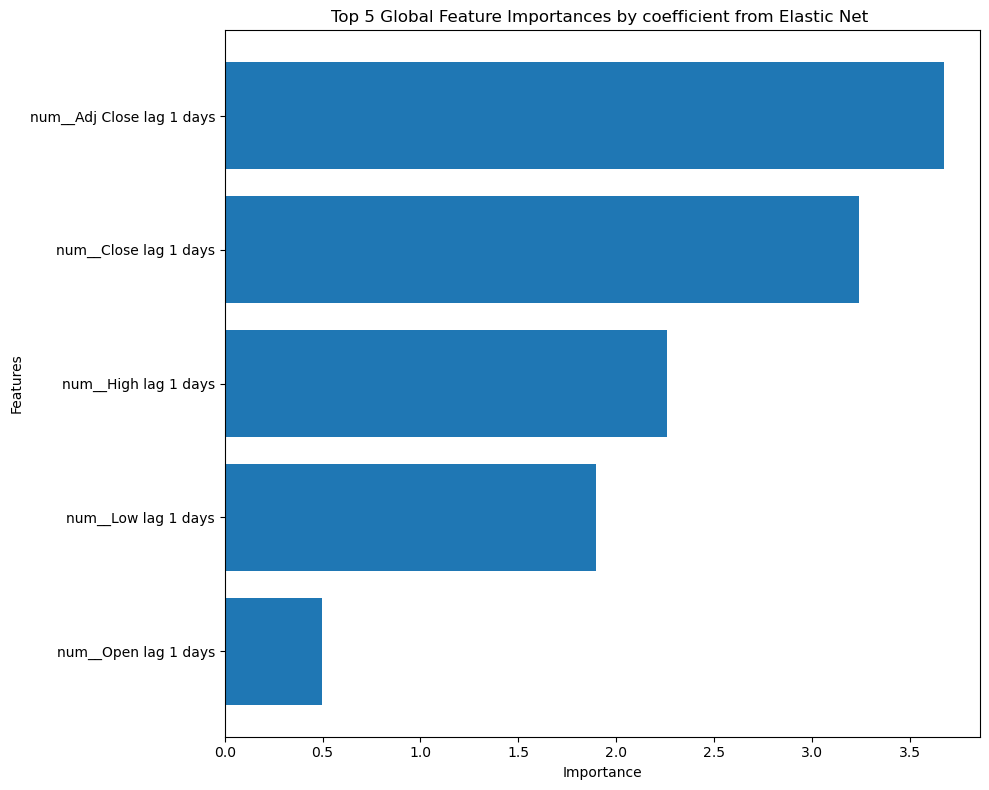

SHAP Force Plot for Data Point 1


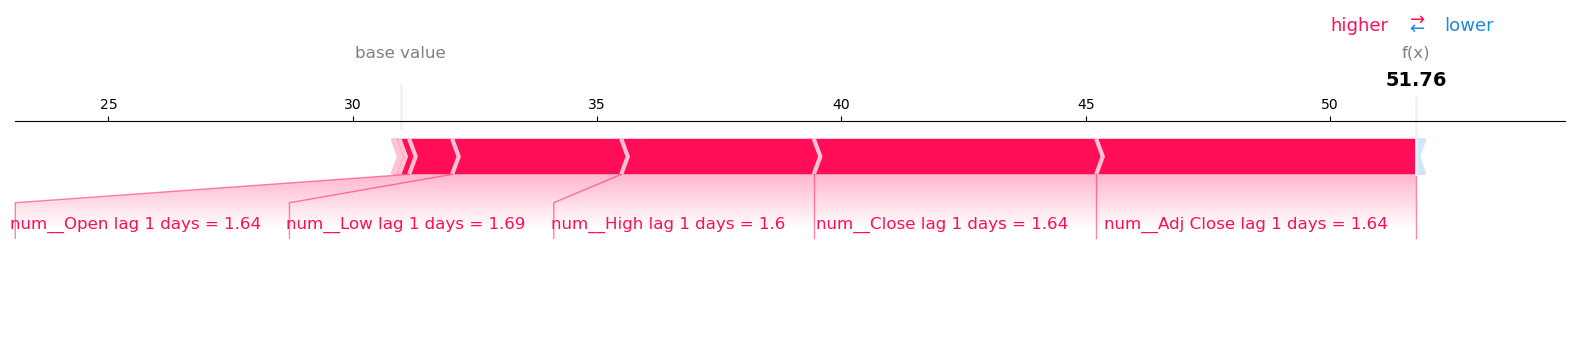

In [66]:
import shap
import matplotlib.pyplot as plt
import numpy as np
feature_importances = np.abs(best_elastic_net_model.coef_)
features = df_train_cleaned.columns
sorted_idx = np.argsort(feature_importances)[-5:] 
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 5 Global Feature Importances by coefficient from Elastic Net ')
plt.tight_layout()
plt.savefig('/Users/a123/Desktop/datas/top_5_feature_importances.png', dpi=300) 
plt.show()



import shap
import numpy as np
explainer = shap.Explainer(best_elastic_net_model, df_train_cleaned)
shap_values = explainer(df_train_cleaned)
sample_index = 0 
sample_shap_values = shap_values.values[sample_index]
sample_features = df_train_cleaned.iloc[sample_index, :]
print(f"SHAP Force Plot for Data Point {sample_index + 1}")
rounded_shap_values = np.round(sample_shap_values, 2)
rounded_sample_features = np.round(sample_features, 2)
shap.force_plot(shap_values.base_values[sample_index], rounded_shap_values, rounded_sample_features, matplotlib=True)




SHAP Force Plot for Data Point 501


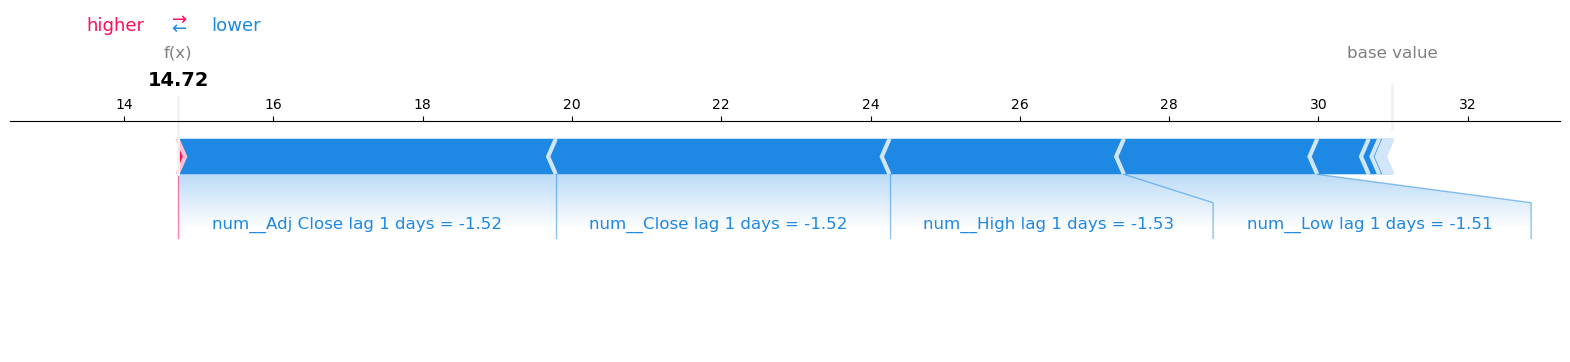

In [44]:
import shap
import numpy as np
explainer = shap.Explainer(best_elastic_net_model, df_train_cleaned)
shap_values = explainer(df_train_cleaned)
sample_index = 500 
sample_shap_values = shap_values.values[sample_index]
sample_features = df_train_cleaned.iloc[sample_index, :]
print(f"SHAP Force Plot for Data Point {sample_index + 1}")
rounded_shap_values = np.round(sample_shap_values, 2)
rounded_sample_features = np.round(sample_features, 2)
shap.force_plot(shap_values.base_values[sample_index], rounded_shap_values, rounded_sample_features, matplotlib=True)


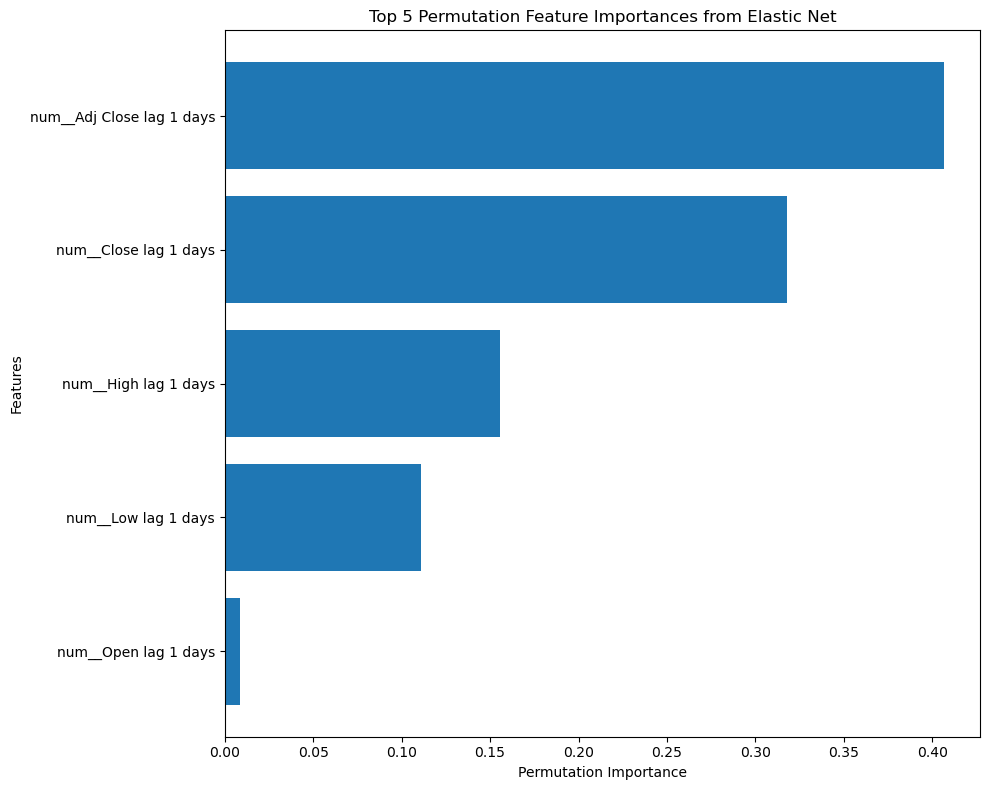

In [67]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

perm_importance = permutation_importance(best_elastic_net_model, df_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)
sorted_idx = perm_importance.importances_mean.argsort()[-5:]  
sorted_features = df_train_cleaned.columns[sorted_idx]
sorted_perm_importances = perm_importance.importances_mean[sorted_idx]
normalized_importances = sorted_perm_importances / np.sum(sorted_perm_importances)
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, normalized_importances)
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Top 5 Permutation Feature Importances from Elastic Net')
plt.tight_layout()
plt.savefig('/Users/a123/Desktop/datas/normalized_permutation_importances.png', dpi=300)
plt.show()


In [32]:
baseline_pred = np.mean(y_train_cleaned)  
baseline_pred_array = np.full(shape=y_test.shape, fill_value=baseline_pred)
baseline_mse = mean_squared_error(y_test, baseline_pred_array)
print("Baseline MSE with means: ", baseline_mse)


Baseline MSE:  687.3927067614962


In [33]:
y_test_shifted = y_test.shift(1).fillna(method='bfill')
baseline_mse = mean_squared_error(y_test, y_test_shifted)
print("Baseline MSE with shifting:", baseline_mse)

Baseline MSE: 2.6513917240228566


divide by zero encountered in log


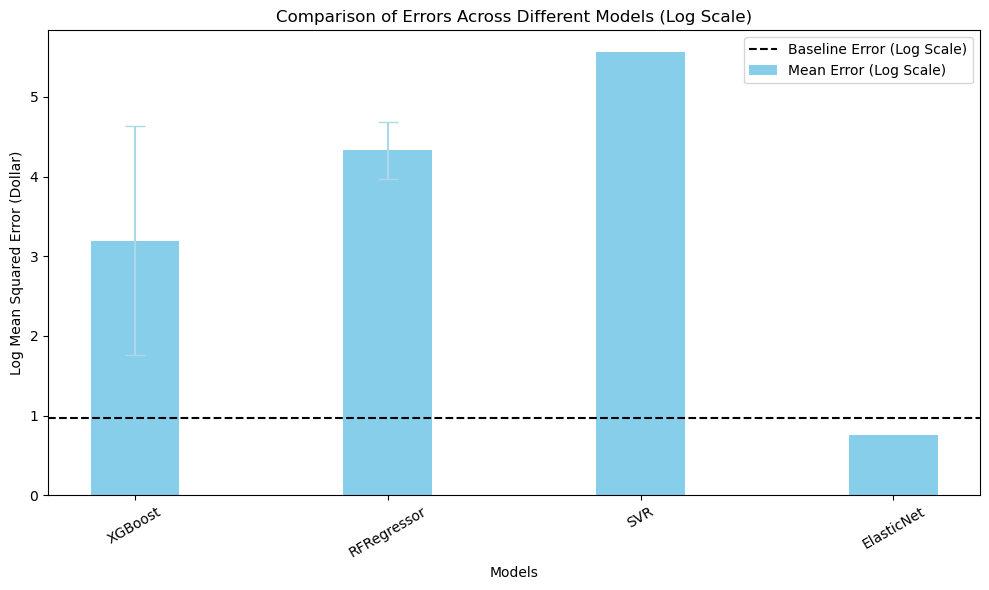

In [64]:
import matplotlib.pyplot as plt
import numpy as np

models = ["XGBoost", "RFRegressor", "SVR", "ElasticNet"]
errors = [24.41, 75.78, 258.97, 2.14]
std = [4.19, 0.70, 0, 0]
baseline = 2.65
width = 0.35
x_pos = np.arange(len(models))
log_errors = np.log(errors)
plt.figure(figsize=(10, 6))  
plt.axhline(y=np.log(baseline), color='black', linestyle='--', label='Baseline Error (Log Scale)')
plt.bar(x_pos, log_errors, color='skyblue', label='Mean Error (Log Scale)', width=width)
for i, error in enumerate(errors):
    if error > 0:
        plt.errorbar(x_pos[i], log_errors[i], yerr=np.abs(np.log(std[i])), capsize=7, fmt='none', ecolor='lightblue')

plt.xlabel('Models')
plt.ylabel('Log Mean Squared Error (Dollar)')
plt.title('Comparison of Errors Across Different Models (Log Scale)')
plt.xticks(x_pos, models, rotation=30)
plt.legend()
plt.tight_layout()
plt.savefig("/Users/a123/Desktop/datas/model_comparison.png", dpi=300)  # Save figure with desired filename and dpi
plt.show()